# Dependencies and imports

In [1]:
import re
import json
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
REVIEWERS_PREFIXES = ['reviewer1', 'reviewer2']
REVIEWERS_NAMES = ['Reviewer1', 'Reviewer2']
DOCUMENT_REGION_MAP = {
    '99bdc9fdd8097f067f77cb220074b1b5': 'Basilicata',
    '07108e7d68b7e897ed6a800be9802105': 'Calabria',
    '2f4c39c9fb796e5066ac28770c5724d6': 'Campania',
    '3e0abd25f3bcf417e9e0a8b74e158ef5': 'Lombardia',
    '396505aaf67c46b9ec1a6818d8fb9af6': 'Lazio',
    '6d52bcc84ee3fa9bfec74bb009537bd2': 'Molise',
    '70da2ae575436d19518deae1ff2125b0': 'Toscana',
    'aae5c6f0c213946d265cb98c08106c0b': 'Veneto',
}

In [3]:
plt.rcParams["figure.figsize"] = (15,10)

plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)
plt.rcParams["axes.edgecolor"] = (1, 1, 1, 1)
plt.rcParams["axes.linewidth"] = 0.8
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.grid.axis"] = 'both'
plt.rcParams["axes.grid.which"] = 'major'

plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.framealpha"] = 0.8
plt.rcParams["legend.facecolor"]  = (1, 1, 1, 1)

# Utils

In [4]:
RULES_TAXONOMY = json.load(open(f'./rules_and_issues/rules.json', 'r'))
RULES_REV_TAXONOMY = json.load(open(f'./rules_and_issues/rules_rev.json', 'r'))

In [5]:
ISSUES_TAXONOMY = json.load(open(f'./rules_and_issues/issues.json', 'r'))
ISSUES_REV_TAXONOMY = json.load(open(f'./rules_and_issues/issues_rev.json', 'r'))

In [6]:
def map_taxonomy(text, taxonomy):
  for taxonomy_item in taxonomy:
    if text in taxonomy_item['items']:
        return taxonomy_item['title']

  print(text)
  return "N/D"

In [7]:
def count_items(raw_items_list, f_mapper):
  items = []
  for raw_items in raw_items_list:
    parsed_items = raw_items.lower().split('|')
    for parsed_item in parsed_items:
      parsed_item = parsed_item.strip()
      if parsed_item != '':
        items.append(f_mapper(parsed_item))
  counts = dict(Counter(items))
  counts = dict(sorted(counts.items(), key=lambda x:x[1])[::-1])
  return counts

# Load Data

In [8]:
dfs = [
  pd.read_csv(f"./corpora/reviewer1.csv"),
  pd.read_csv(f"./corpora/reviewer2.csv")
]

# Rules

## Bar

verbo negativo non può prescindere sostituito da forma attiva deve derivare
usare il riferimento chiaro al numero della legge già introdotta
sostituire espressioni formali con espressioni più colloquiali
dare continuità ai soggetti delle varie frasi
chiarezza in tutto il testo e omogeneità di costrutti sintattici
eliminazione di parole e espressioni molto più formali a vantaggio di parole concrete
il più possibile portare a soggetto il cittadino o l'azienda per far capire chi fa cosa
eliminazione giri di parole (diffonde informazioni) sostituiti da espressioni più dirette
usare verbi semplici come si chiama invece di è denominato
molte sostituzioni di termini astratti categorie protette con parole concrete persone con difficoltà
agevolazione di prezzo diventa prezzi più bassi
un verbo in più aggiunto (conoscere)
capovolgere la frase mettendo come soggetto i cittadini (principio di empatia e di agentività), in questo modo si illustra al cittadino quello che deve/può fare asciugando le p

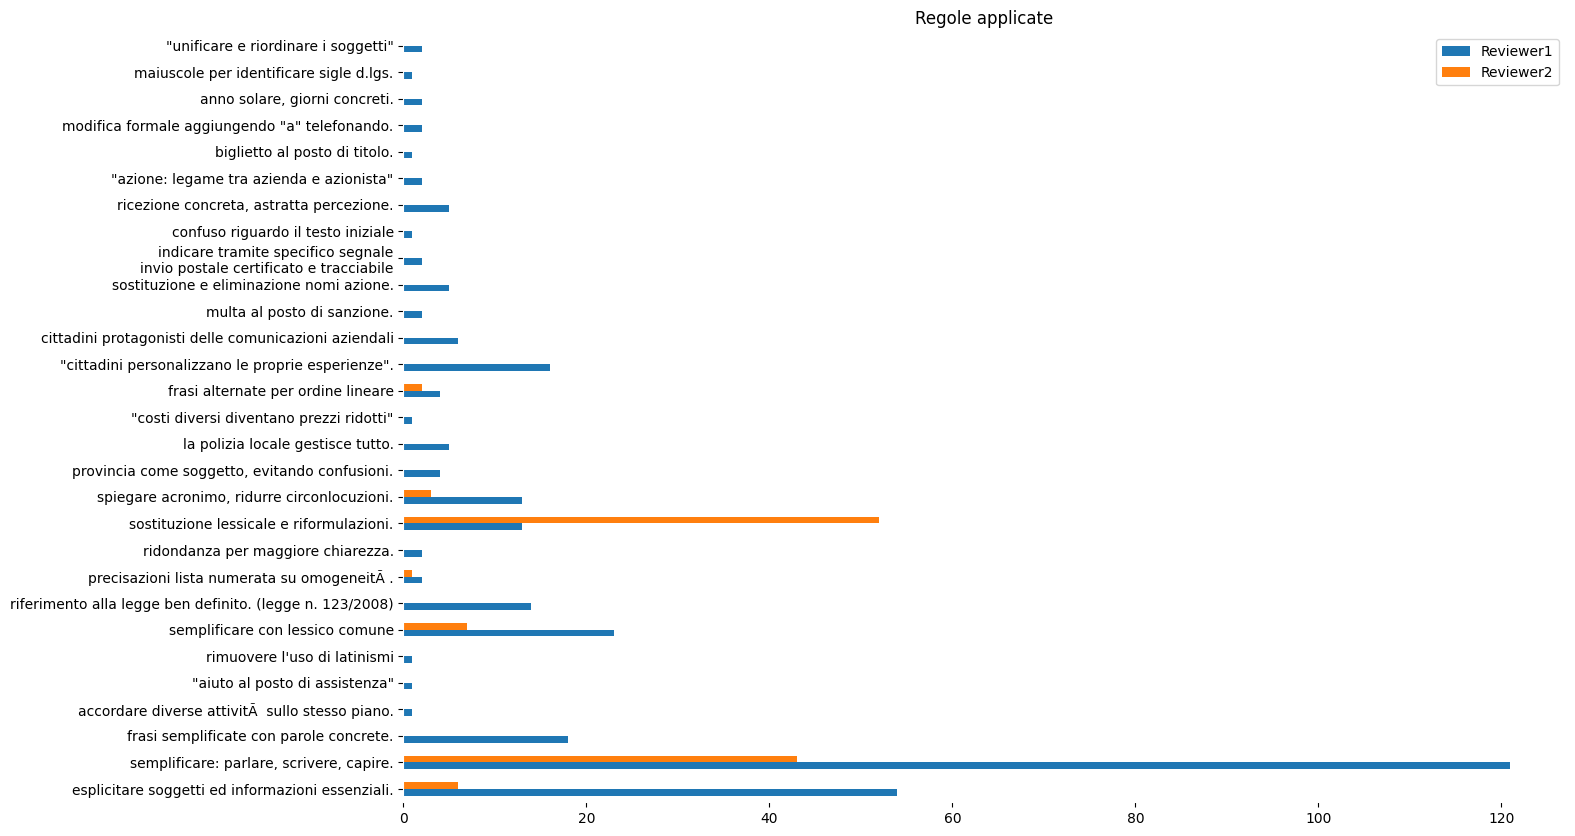

,Reviewer1,Reviewer2
rule,,
esplicitare soggetti ed informazioni essenziali.,54,6.0
"semplificare: parlare, scrivere, capire.",121,43.0
frasi semplificate con parole concrete.,18,NaN
accordare diverse attivitÃ sullo stesso piano.,1,NaN
"""aiuto al posto di assistenza""",1,NaN
rimuovere l'uso di latinismi,1,NaN
semplificare con lessico comune,23,7.0
riferimento alla legge ben definito. (legge n. 123/2008),14,NaN
precisazioni lista numerata su omogeneitÃ .,2,1.0


In [9]:
rules_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in RULES_TAXONOMY], columns=['rule'])
for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
  counter = count_items(df[f'simplification_rules_applied'].dropna(), lambda x: map_taxonomy(x, RULES_TAXONOMY))
  tmp_df = pd.DataFrame(counter.items(), columns=['rule', REVIEWER_NAME])
  rules_df = rules_df.merge(tmp_df, on='rule', how='left')

rules_df.index = rules_df['rule']
rules_df = rules_df.drop('rule', axis=1)

rules_df.plot(kind='barh')
plt.title('Regole applicate')
plt.xlabel('')
plt.ylabel('')
plt.show()

display(rules_df)

## Regional bar

verbo negativo non può prescindere sostituito da forma attiva deve derivare
usare il riferimento chiaro al numero della legge già introdotta
sostituire espressioni formali con espressioni più colloquiali
dare continuità ai soggetti delle varie frasi
chiarezza in tutto il testo e omogeneità di costrutti sintattici
eliminazione di parole e espressioni molto più formali a vantaggio di parole concrete
il più possibile portare a soggetto il cittadino o l'azienda per far capire chi fa cosa
eliminazione giri di parole (diffonde informazioni) sostituiti da espressioni più dirette
usare verbi semplici come si chiama invece di è denominato
molte sostituzioni di termini astratti categorie protette con parole concrete persone con difficoltà
agevolazione di prezzo diventa prezzi più bassi
un verbo in più aggiunto (conoscere)
capovolgere la frase mettendo come soggetto i cittadini (principio di empatia e di agentività), in questo modo si illustra al cittadino quello che deve/può fare asciugando le p

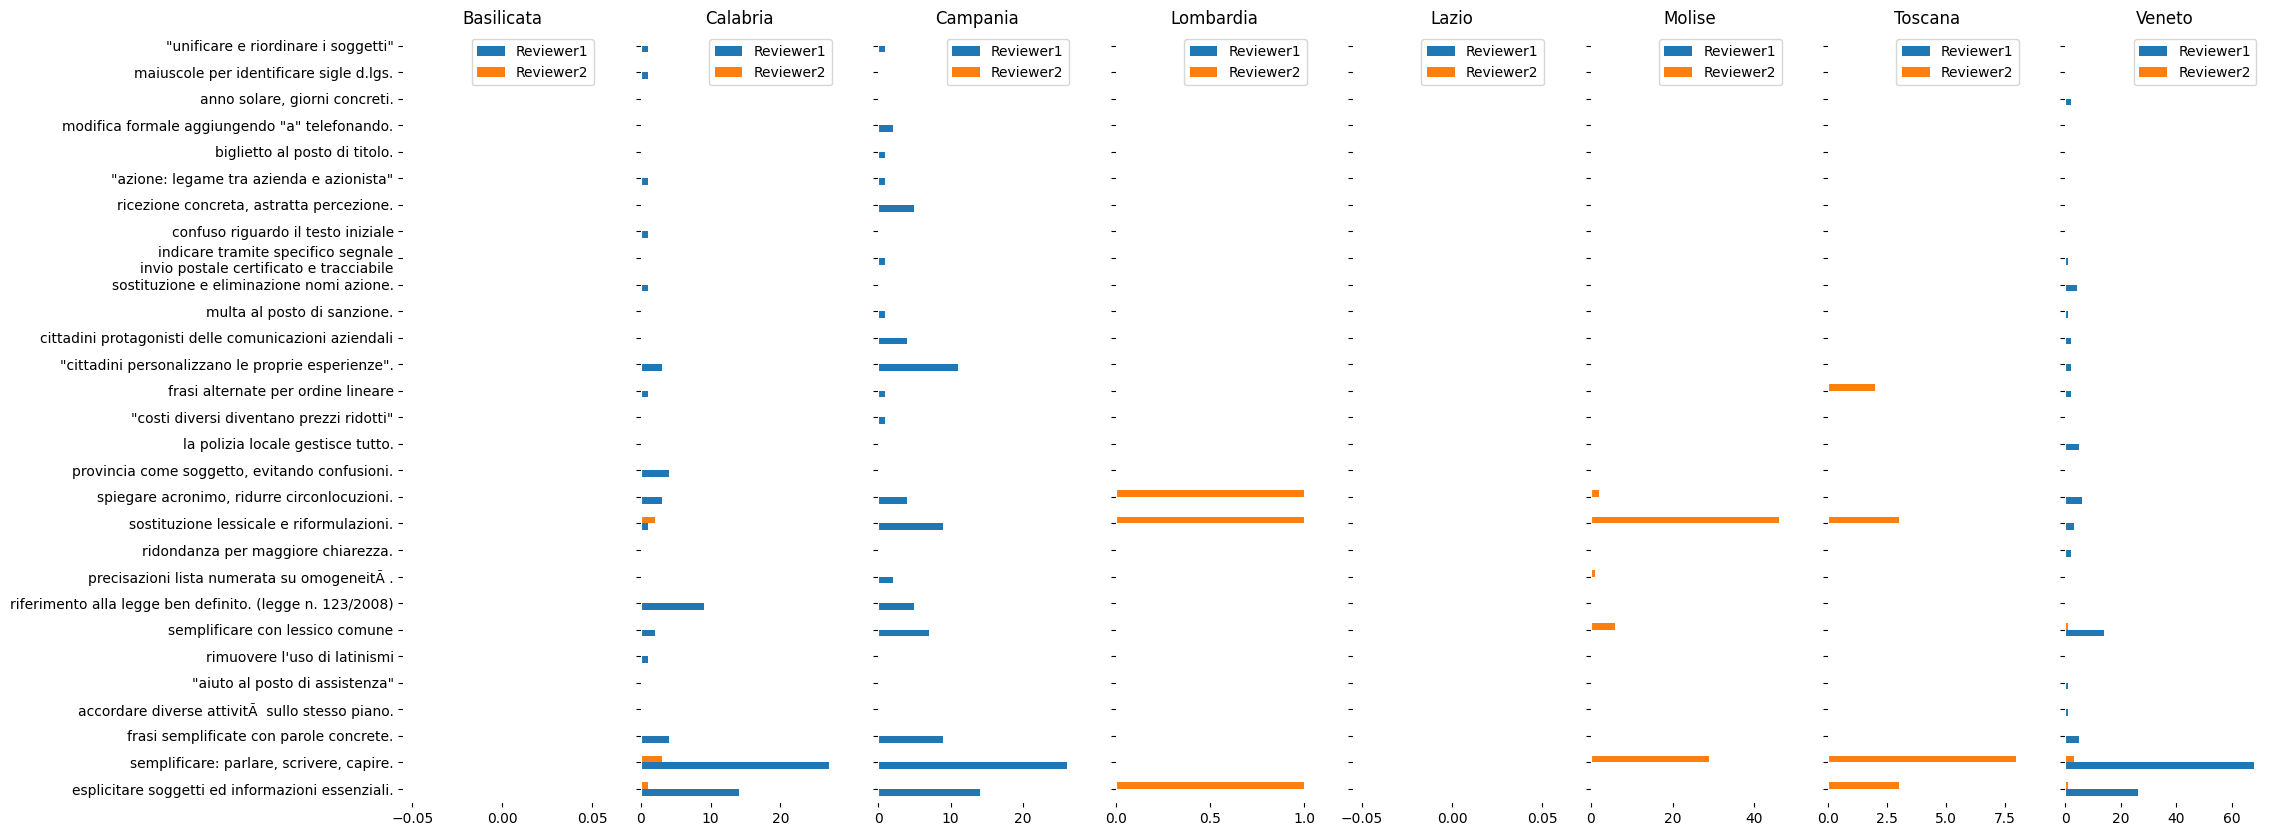

In [10]:
fig, axs = plt.subplots(1, len(DOCUMENT_REGION_MAP.keys()), sharey='row', figsize=(24, 10))

for i, (DOCUMENT_ID, REGION) in enumerate(DOCUMENT_REGION_MAP.items()):
  rules_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in RULES_TAXONOMY], columns=['rule'])
  for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
    counter = count_items(df[df['document'] == DOCUMENT_ID][f'simplification_rules_applied'].dropna(), lambda x: map_taxonomy(x, RULES_TAXONOMY))
    tmp_df = pd.DataFrame(counter.items(), columns=['rule', REVIEWER_NAME])
    rules_df = rules_df.merge(tmp_df, on='rule', how='left')

  rules_df.index = rules_df['rule']
  rules_df = rules_df.drop('rule', axis=1)

  rules_df.plot(kind='barh', ax=axs[i])
  axs[i].set_title(REGION)
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')

plt.show()

# Rules rev

## Bar

verbo negativo non può prescindere sostituito da forma attiva deve derivare
usare il riferimento chiaro al numero della legge già introdotta
sostituire espressioni formali con espressioni più colloquiali
dare continuità ai soggetti delle varie frasi
chiarezza in tutto il testo e omogeneità di costrutti sintattici
eliminazione di parole e espressioni molto più formali a vantaggio di parole concrete
il più possibile portare a soggetto il cittadino o l'azienda per far capire chi fa cosa
eliminazione giri di parole (diffonde informazioni) sostituiti da espressioni più dirette
usare verbi semplici come si chiama invece di è denominato
molte sostituzioni di termini astratti categorie protette con parole concrete persone con difficoltà
agevolazione di prezzo diventa prezzi più bassi
un verbo in più aggiunto (conoscere)
capovolgere la frase mettendo come soggetto i cittadini (principio di empatia e di agentività), in questo modo si illustra al cittadino quello che deve/può fare asciugando le p

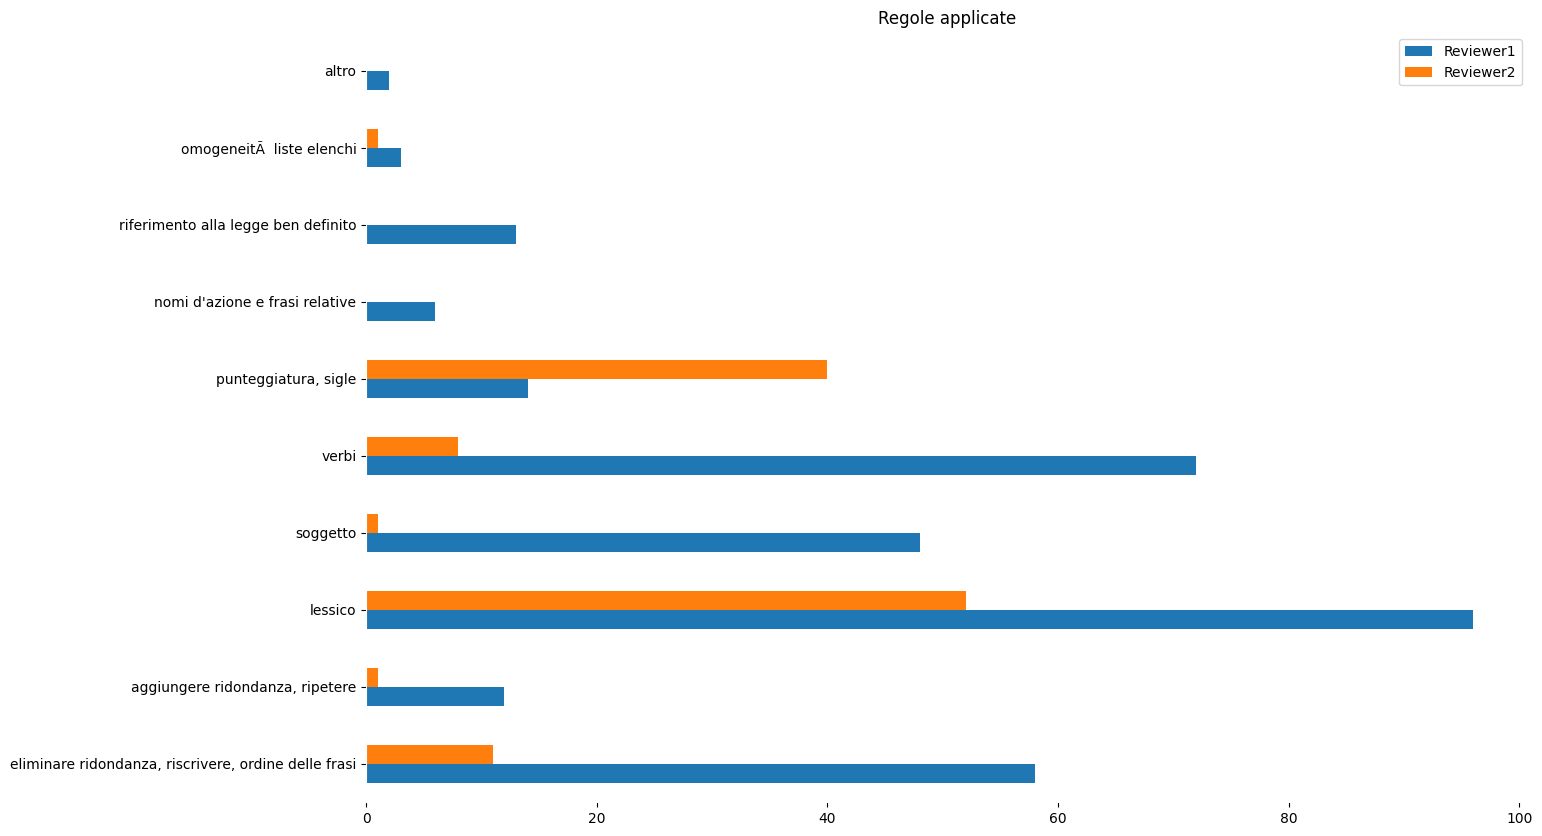

,Reviewer1,Reviewer2
rule,,
"eliminare ridondanza, riscrivere, ordine delle frasi",58,11.0
"aggiungere ridondanza, ripetere",12,1.0
lessico,96,52.0
soggetto,48,1.0
verbi,72,8.0
"punteggiatura, sigle",14,40.0
nomi d'azione e frasi relative,6,NaN
riferimento alla legge ben definito,13,NaN
omogeneitÃ liste elenchi,3,1.0


In [11]:
rules_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in RULES_REV_TAXONOMY], columns=['rule'])
for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
  counter = count_items(df[f'simplification_rules_applied'].dropna(), lambda x: map_taxonomy(x, RULES_REV_TAXONOMY))
  tmp_df = pd.DataFrame(counter.items(), columns=['rule', REVIEWER_NAME])
  rules_df = rules_df.merge(tmp_df, on='rule', how='left')

rules_df.index = rules_df['rule']
rules_df = rules_df.drop('rule', axis=1)

rules_df.plot(kind='barh')
plt.title('Regole applicate')
plt.xlabel('')
plt.ylabel('')
plt.show()

display(rules_df)

## Regional bar

verbo negativo non può prescindere sostituito da forma attiva deve derivare
usare il riferimento chiaro al numero della legge già introdotta
sostituire espressioni formali con espressioni più colloquiali
dare continuità ai soggetti delle varie frasi
chiarezza in tutto il testo e omogeneità di costrutti sintattici
eliminazione di parole e espressioni molto più formali a vantaggio di parole concrete
il più possibile portare a soggetto il cittadino o l'azienda per far capire chi fa cosa
eliminazione giri di parole (diffonde informazioni) sostituiti da espressioni più dirette
usare verbi semplici come si chiama invece di è denominato
molte sostituzioni di termini astratti categorie protette con parole concrete persone con difficoltà
agevolazione di prezzo diventa prezzi più bassi
un verbo in più aggiunto (conoscere)
capovolgere la frase mettendo come soggetto i cittadini (principio di empatia e di agentività), in questo modo si illustra al cittadino quello che deve/può fare asciugando le p

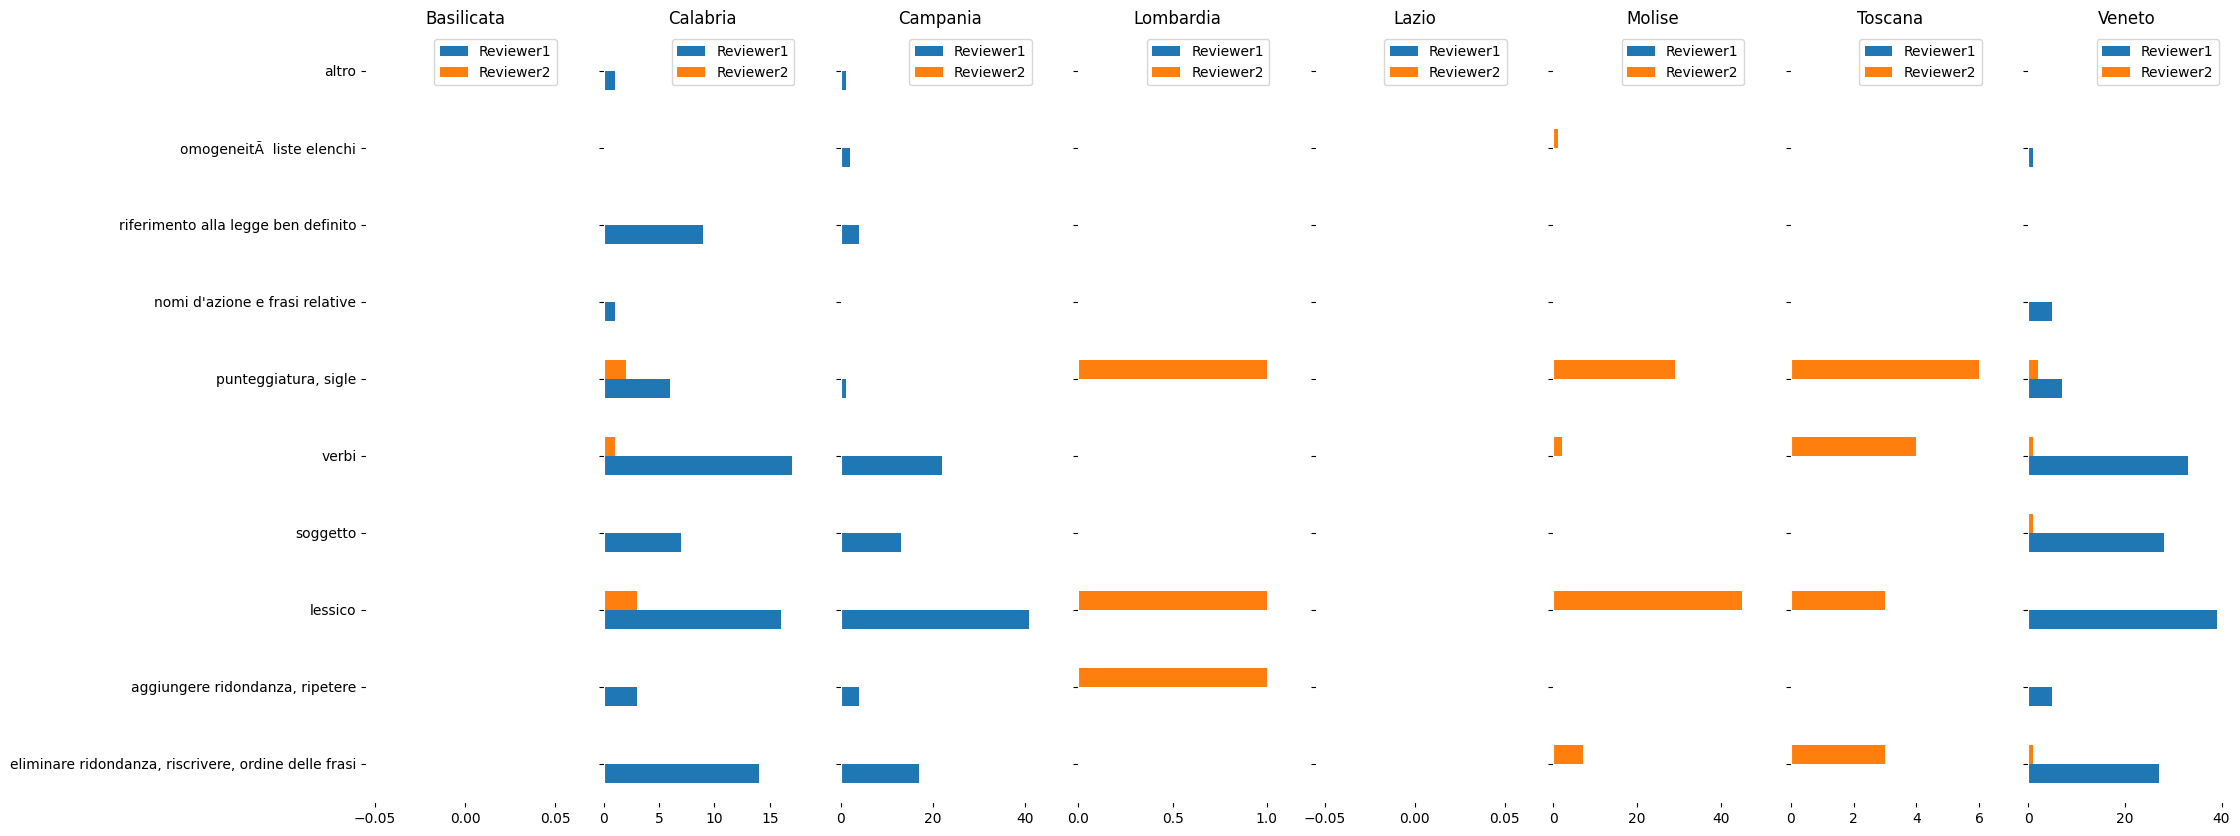

In [12]:
fig, axs = plt.subplots(1, len(DOCUMENT_REGION_MAP.keys()), sharey='row', figsize=(24, 10))

for i, (DOCUMENT_ID, REGION) in enumerate(DOCUMENT_REGION_MAP.items()):
  rules_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in RULES_REV_TAXONOMY], columns=['rule'])
  for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
    counter = count_items(df[df['document'] == DOCUMENT_ID][f'simplification_rules_applied'].dropna(), lambda x: map_taxonomy(x, RULES_REV_TAXONOMY))
    tmp_df = pd.DataFrame(counter.items(), columns=['rule', REVIEWER_NAME])
    rules_df = rules_df.merge(tmp_df, on='rule', how='left')

  rules_df.index = rules_df['rule']
  rules_df = rules_df.drop('rule', axis=1)

  rules_df.plot(kind='barh', ax=axs[i])
  axs[i].set_title(REGION)
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')

plt.show()

# Text issues

## Bar

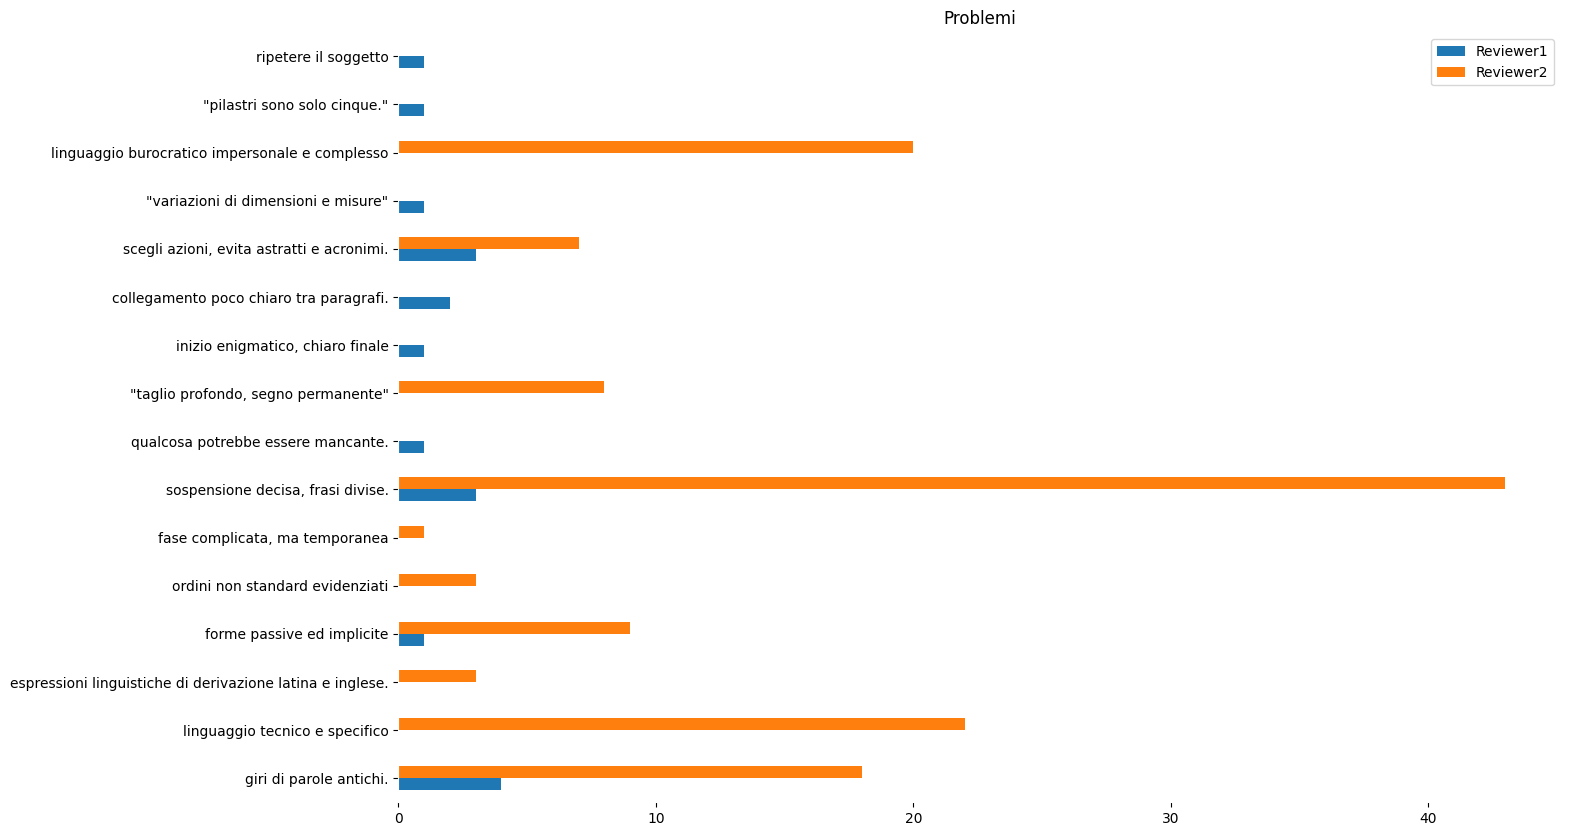

,Reviewer1,Reviewer2
issue,,
giri di parole antichi.,4.0,18.0
linguaggio tecnico e specifico,NaN,22.0
espressioni linguistiche di derivazione latina e inglese.,NaN,3.0
forme passive ed implicite,1.0,9.0
ordini non standard evidenziati,NaN,3.0
"fase complicata, ma temporanea",NaN,1.0
"sospensione decisa, frasi divise.",3.0,43.0
qualcosa potrebbe essere mancante.,1.0,NaN
"""taglio profondo, segno permanente""",NaN,8.0


In [13]:
issues_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in ISSUES_TAXONOMY], columns=['issue'])
for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
  counter = count_items(df[f'original_text_isssues_detected'].dropna(), lambda x: map_taxonomy(x, ISSUES_TAXONOMY))
  tmp_df = pd.DataFrame(counter.items(), columns=['issue', REVIEWER_NAME])
  issues_df = issues_df.merge(tmp_df, on='issue', how='left')

issues_df.index = issues_df['issue']
issues_df = issues_df.drop('issue', axis=1)

issues_df.plot(kind='barh')
plt.title('Problemi')
plt.xlabel('')
plt.ylabel('')
plt.show()

display(issues_df)

## Regional bar

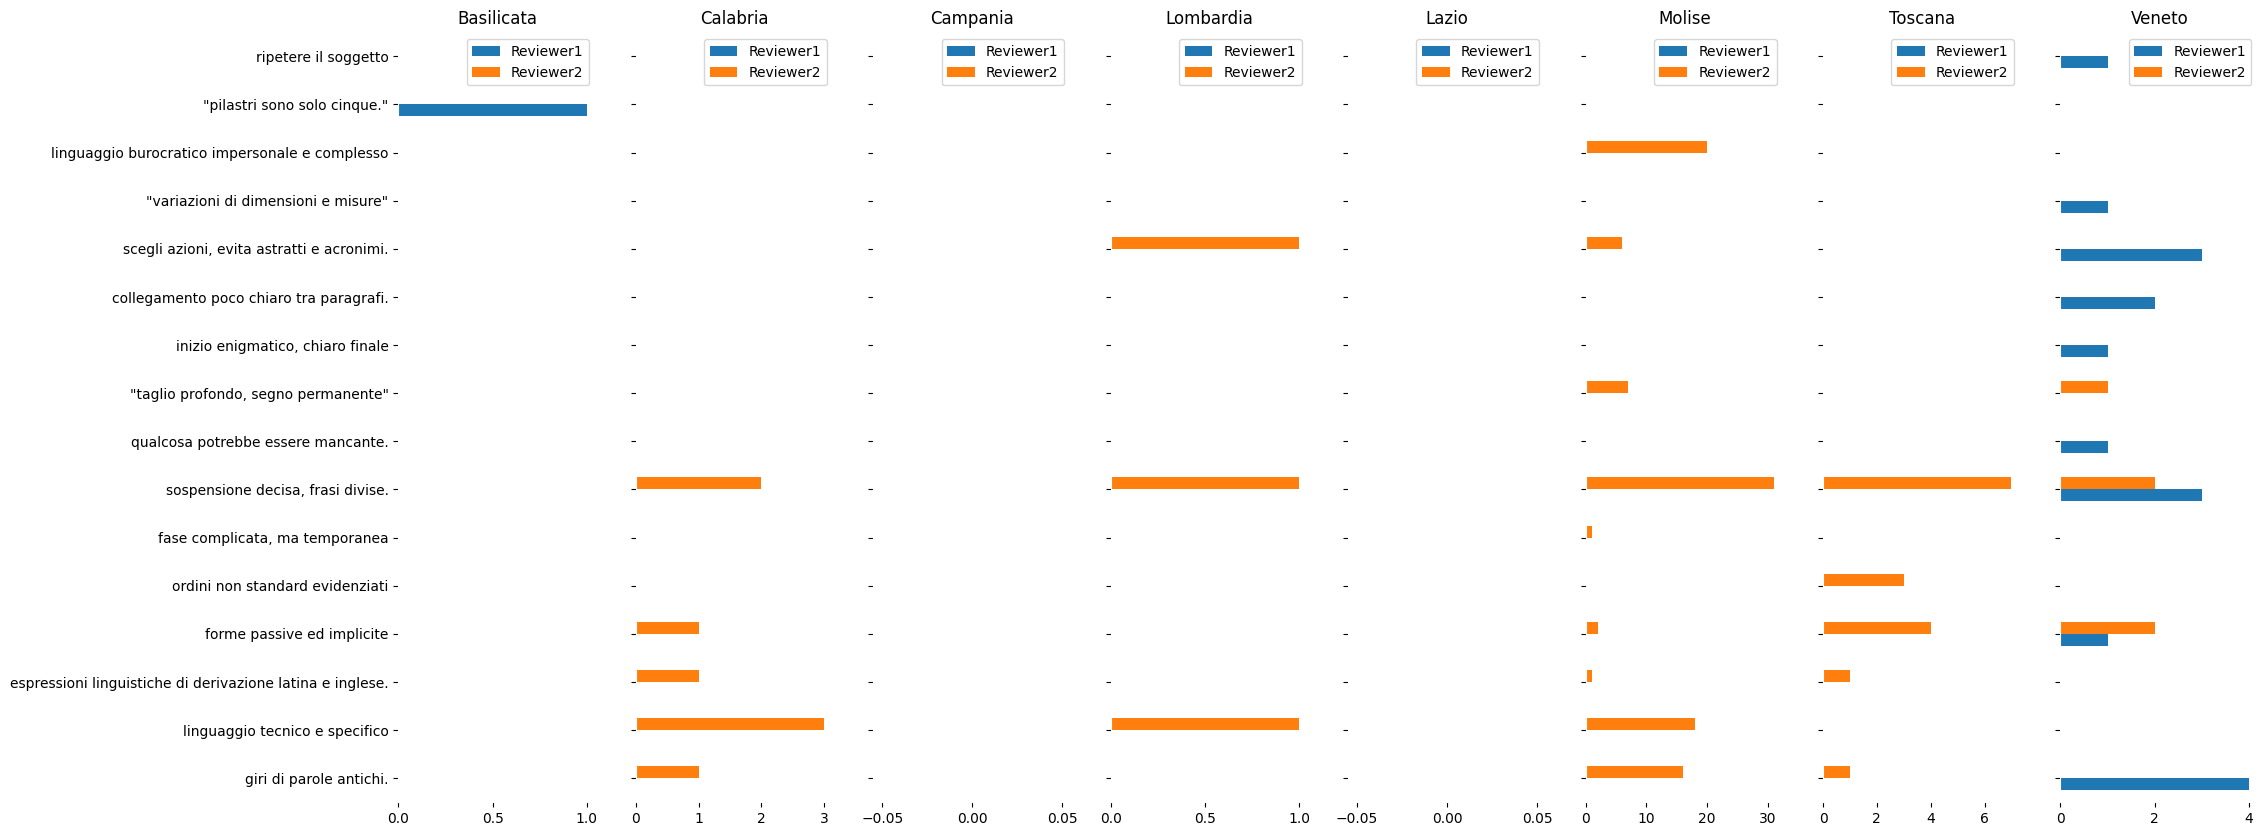

In [14]:
fig, axs = plt.subplots(1, len(DOCUMENT_REGION_MAP.keys()), sharey='row', figsize=(24, 10))

for i, (DOCUMENT_ID, REGION) in enumerate(DOCUMENT_REGION_MAP.items()):
  issues_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in ISSUES_TAXONOMY], columns=['issue'])
  for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
    counter = count_items(df[df['document'] == DOCUMENT_ID][f'original_text_isssues_detected'].dropna(), lambda x: map_taxonomy(x, ISSUES_TAXONOMY))
    tmp_df = pd.DataFrame(counter.items(), columns=['issue', REVIEWER_NAME])
    issues_df = issues_df.merge(tmp_df, on='issue', how='left')

  issues_df.index = issues_df['issue']
  issues_df = issues_df.drop('issue', axis=1)

  issues_df.plot(kind='barh', ax=axs[i])
  axs[i].set_title(REGION)
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')

plt.show()

# Text issues rev

## Bar

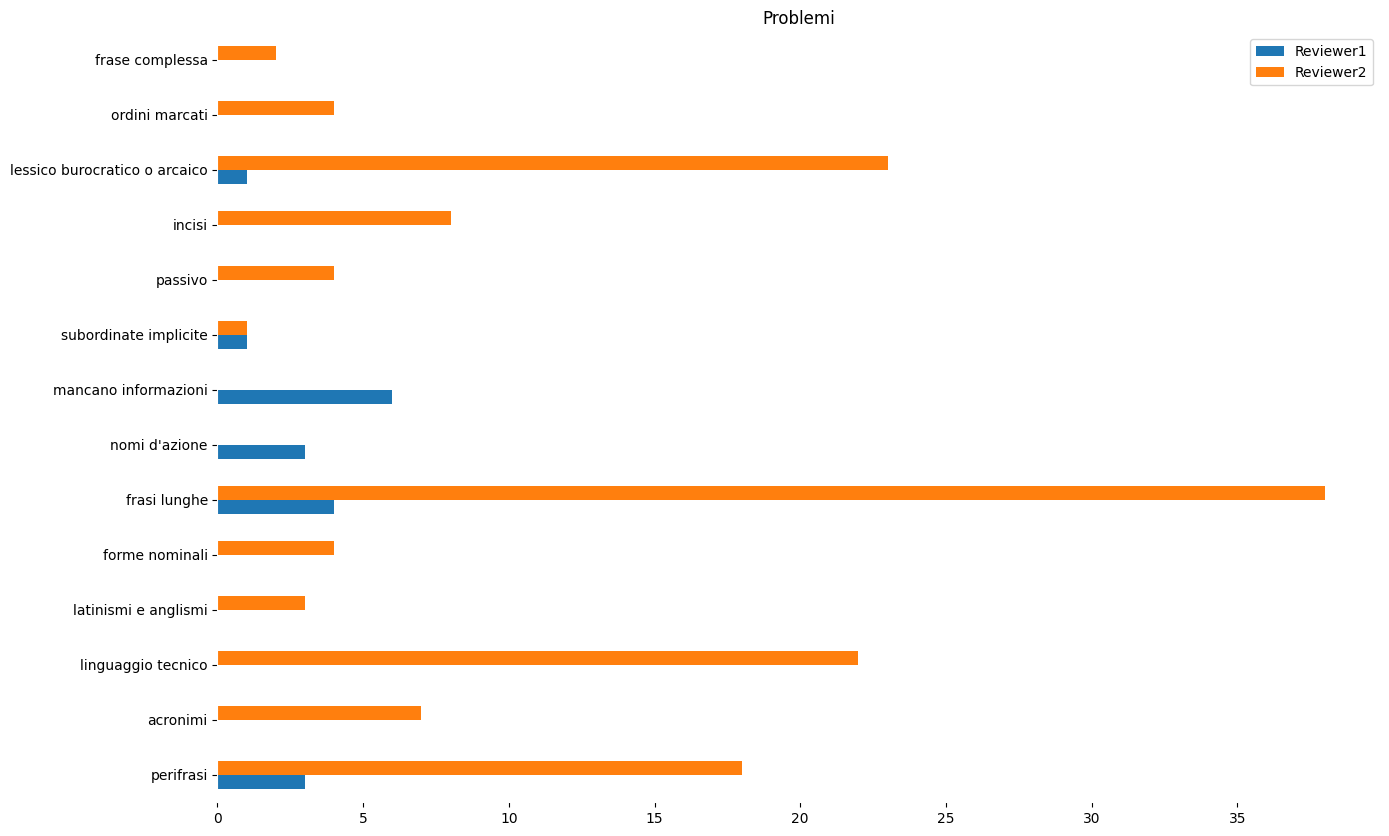

,Reviewer1,Reviewer2
issue,,
perifrasi,3.0,18.0
acronimi,NaN,7.0
linguaggio tecnico,NaN,22.0
latinismi e anglismi,NaN,3.0
forme nominali,NaN,4.0
frasi lunghe,4.0,38.0
nomi d'azione,3.0,NaN
mancano informazioni,6.0,NaN
subordinate implicite,1.0,1.0


In [15]:
issues_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in ISSUES_REV_TAXONOMY], columns=['issue'])
for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
  counter = count_items(df[f'original_text_isssues_detected'].dropna(), lambda x: map_taxonomy(x, ISSUES_REV_TAXONOMY))
  tmp_df = pd.DataFrame(counter.items(), columns=['issue', REVIEWER_NAME])
  issues_df = issues_df.merge(tmp_df, on='issue', how='left')

issues_df.index = issues_df['issue']
issues_df = issues_df.drop('issue', axis=1)

issues_df.plot(kind='barh')
plt.title('Problemi')
plt.xlabel('')
plt.ylabel('')
plt.show()

display(issues_df)

## Regional bar

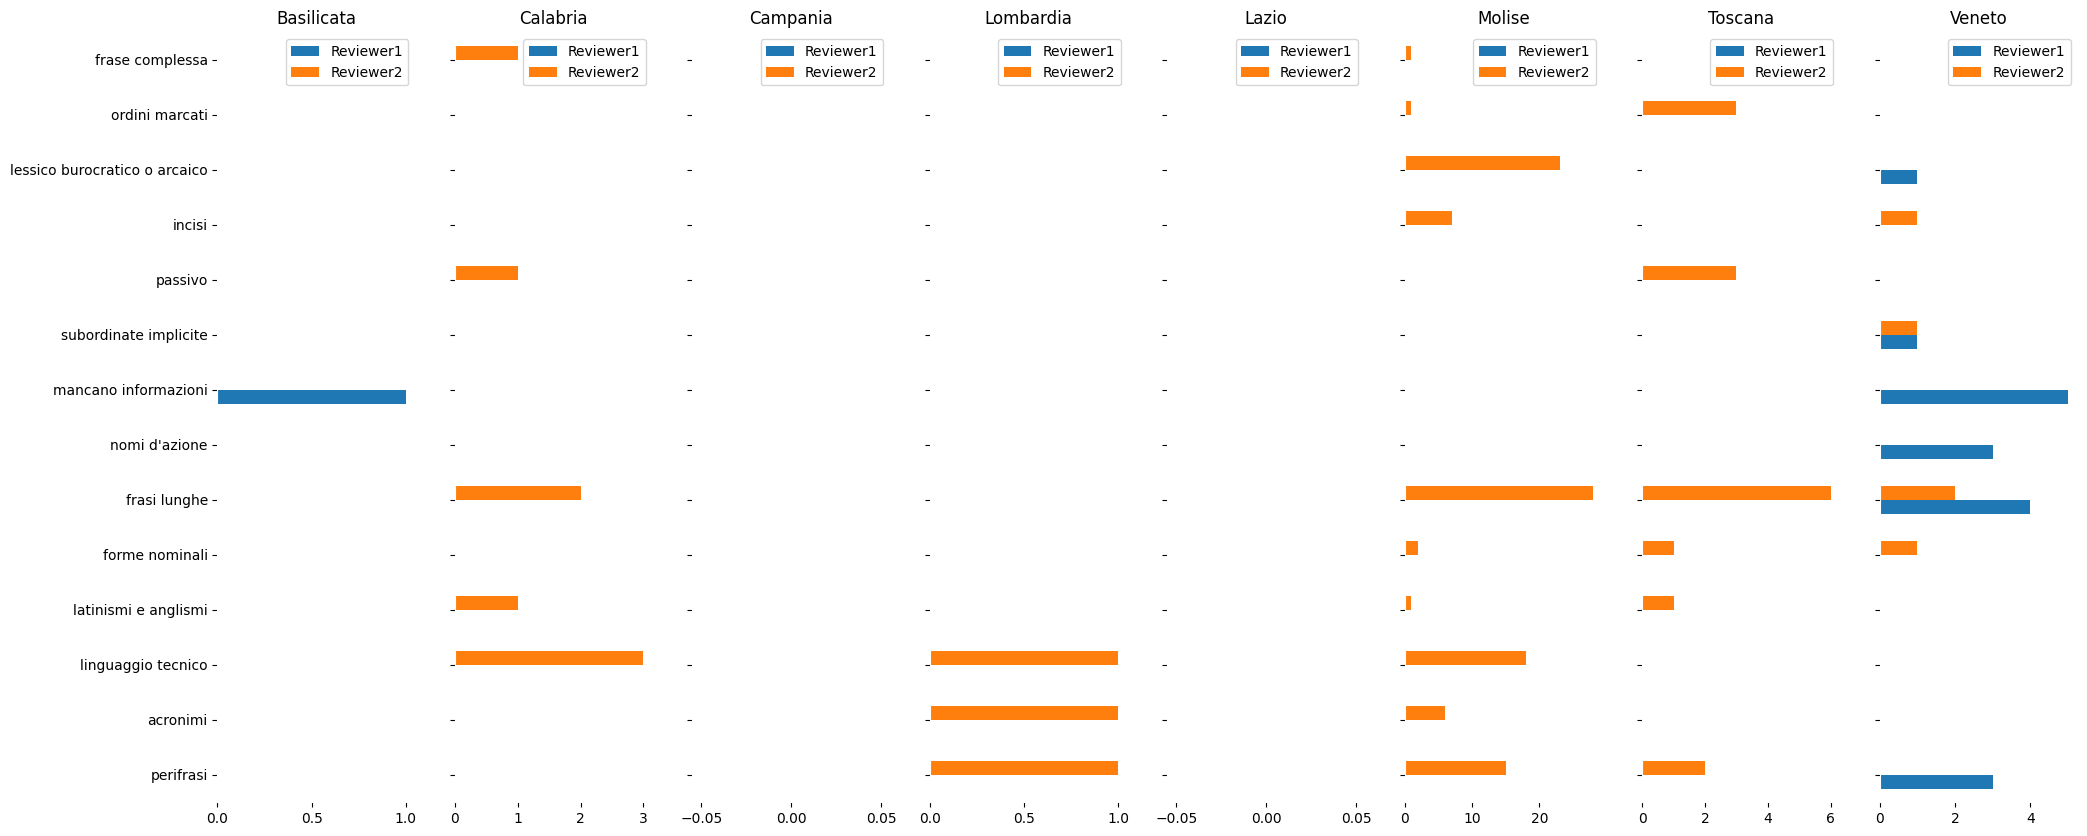

In [16]:
fig, axs = plt.subplots(1, len(DOCUMENT_REGION_MAP.keys()), sharey='row', figsize=(24, 10))

for i, (DOCUMENT_ID, REGION) in enumerate(DOCUMENT_REGION_MAP.items()):
  issues_df = pd.DataFrame([taxonomy_item['title'] for taxonomy_item in ISSUES_REV_TAXONOMY], columns=['issue'])
  for df, REVIEWER_NAME in zip(dfs, REVIEWERS_NAMES):
    counter = count_items(df[df['document'] == DOCUMENT_ID][f'original_text_isssues_detected'].dropna(), lambda x: map_taxonomy(x, ISSUES_REV_TAXONOMY))
    tmp_df = pd.DataFrame(counter.items(), columns=['issue', REVIEWER_NAME])
    issues_df = issues_df.merge(tmp_df, on='issue', how='left')

  issues_df.index = issues_df['issue']
  issues_df = issues_df.drop('issue', axis=1)

  issues_df.plot(kind='barh', ax=axs[i])
  axs[i].set_title(REGION)
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')

plt.show()